# Astra Zeneca Case Study:
## exploring adverse drug events reported in OpenFDA database

At interview you should expect to discuss your code, any statistics or visualizations you may have used, limitations of the underlying data, and how your solution could be generalized, extended, and made into a robust product. 


In [45]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

from pandas.io.json import json_normalize

## Are different adverse events reported in different countries?     

In [46]:
#get all patient reactions
URL = "https://api.fda.gov/drug/event.json?count=patient.reaction.reactionmeddrapt.exact"
data = requests.get(URL).json()
rxn_counts = pd.DataFrame(data.get("results"))
rxn_counts.shape

(100, 2)

In [47]:
rxn_counts.head(2)

,count,term
0,418242,DRUG INEFFECTIVE
1,318287,NAUSEA


In [48]:
#get all country counts 
URL = "https://api.fda.gov/drug/event.json?count=occurcountry.exact"
data = requests.get(URL).json()
country = pd.DataFrame(data.get("results"))
country.shape

(100, 2)

In [49]:
# list of reactions
rxns = []
for i in rxn_counts.term:
    rxns.append(i.replace(" ", "+"))

# create list of URLS to get reaction counts for all countries
URL = "https://api.fda.gov/drug/event.json?search=patient.reaction.reactionmeddrapt:XXX&count=occurcountry.exact"
URL_x=[]
for i in rxns:
    URL_x.append(URL.replace("XXX", i))

# download data and store in dataframe
df_append = []
for url in URL_x:
    data = requests.get(url).json()
    df = pd.DataFrame(data.get("results"))
    df.set_index("term", drop=True, inplace=True)
    df_append.append(df)

In [50]:
# concatenate all diseases by country

final_df = pd.concat(df_append, axis = 1)
final_df.columns = rxns
final_df.shape

(178, 100)

In [51]:
final_df.head(3)

,DRUG+INEFFECTIVE,NAUSEA,DEATH,FATIGUE,HEADACHE,DYSPNOEA,DIARRHOEA,PAIN,DIZZINESS,VOMITING,...,RENAL+FAILURE+ACUTE,INFLUENZA+LIKE+ILLNESS,DISEASE+PROGRESSION,ABDOMINAL+DISTENSION,NO+ADVERSE+EVENT,TOXICITY+TO+VARIOUS+AGENTS,CARDIAC+ARREST,PSORIASIS,COMPLETED+SUICIDE,HEART+RATE+INCREASED
AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
AE,48.0,24.0,24.0,12.0,12.0,20.0,13.0,67.0,17.0,29.0,...,64.0,25.0,7.0,22.0,210.0,38.0,14.0,8.0,5.0,70.0
AF,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
final_df.describe()

,DRUG+INEFFECTIVE,NAUSEA,DEATH,FATIGUE,HEADACHE,DYSPNOEA,DIARRHOEA,PAIN,DIZZINESS,VOMITING,...,RENAL+FAILURE+ACUTE,INFLUENZA+LIKE+ILLNESS,DISEASE+PROGRESSION,ABDOMINAL+DISTENSION,NO+ADVERSE+EVENT,TOXICITY+TO+VARIOUS+AGENTS,CARDIAC+ARREST,PSORIASIS,COMPLETED+SUICIDE,HEART+RATE+INCREASED
count,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,...,100.000000,100.000000,100.000000,100.00000,1.000000e+02,100.000000,100.000000,76.000000,88.000000,100.000000
mean,7188.040000,1684.23000,2045.680000,1668.33000,1450.460000,1276.360000,1291.430000,5158.350000,1120.02000,984.190000,...,2627.190000,1186.500000,1425.440000,1523.20000,1.648363e+04,3115.730000,1122.070000,408.039474,319.579545,5952.360000
std,60204.820799,13362.48549,11833.329332,13529.13787,11773.238678,8961.395192,9533.427115,41753.326348,8634.22344,6785.488374,...,13694.657531,9784.639653,8667.061914,11499.81517,1.186010e+05,20611.026919,7485.266533,3024.905678,2012.062479,41529.111925
min,11.000000,2.00000,11.000000,1.00000,2.000000,3.000000,3.000000,6.000000,2.00000,3.000000,...,13.000000,1.000000,3.000000,2.00000,3.400000e+01,10.000000,3.000000,1.000000,1.000000,10.000000
25%,26.750000,8.00000,43.750000,6.75000,8.750000,11.000000,9.750000,23.500000,4.00000,9.750000,...,32.000000,4.000000,12.500000,10.75000,1.050000e+02,32.000000,11.000000,2.000000,2.000000,41.750000
50%,122.500000,31.50000,169.000000,26.50000,29.000000,53.500000,35.000000,87.000000,26.50000,48.000000,...,191.500000,16.500000,69.000000,39.00000,5.735000e+02,160.000000,72.000000,10.000000,13.000000,169.000000
75%,835.500000,209.50000,652.750000,225.50000,171.750000,270.750000,235.000000,659.500000,159.50000,223.000000,...,920.250000,114.000000,388.250000,263.50000,2.975500e+03,717.750000,269.500000,39.250000,52.250000,1138.250000
max,602511.000000,133616.00000,117603.000000,135212.00000,117729.000000,89415.000000,95233.000000,417595.000000,86248.00000,67727.000000,...,134457.000000,97863.000000,85881.000000,114900.00000,1.184843e+06,205233.000000,74781.000000,26397.000000,18837.000000,414189.000000


##### NULL VALUES DISTRIBUTION

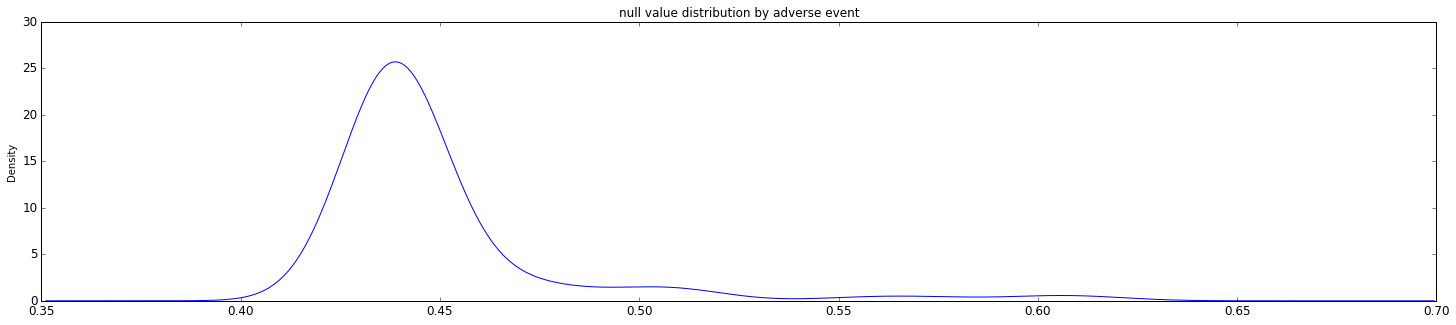

In [53]:
x = (final_df.isnull().sum(axis=0)/final_df.shape[0])
x.plot(kind= "kde", figsize = (25,5), fontsize = 12)
plt.title("null value distribution by adverse event")
plt.show()


In [54]:
"""
x = (final_df.isnull().sum(axis=0)/final_df.shape[0])
x.plot(kind= "bar", figsize = (25,5), fontsize = 8)
plt.title("null value distribution by adverse event")
plt.show()
"""

'\nx = (final_df.isnull().sum(axis=0)/final_df.shape[0])\nx.plot(kind= "bar", figsize = (25,5), fontsize = 8)\nplt.title("null value distribution by adverse event")\nplt.show()\n'

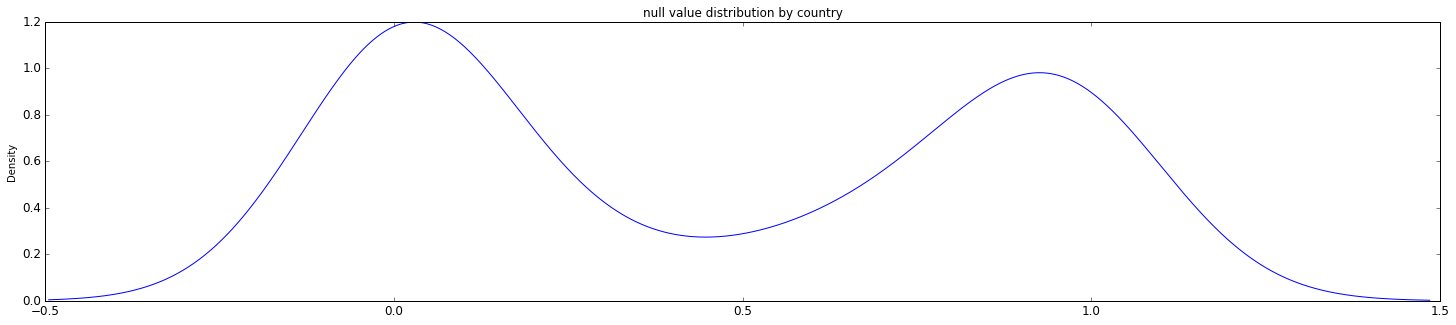

In [55]:
x = (final_df.isnull().sum(axis=1)/final_df.shape[1])
x.plot(kind= "kde", figsize = (25,5), fontsize = 12)
plt.title("null value distribution by country")
plt.show()

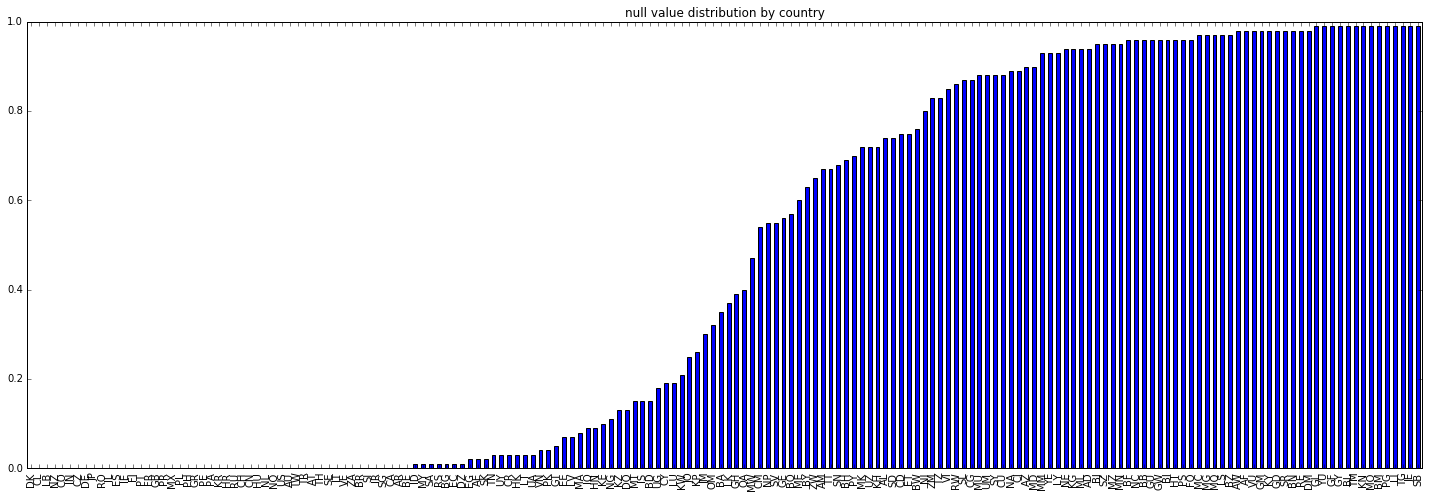

In [56]:
x = (final_df.isnull().sum(axis=1)/final_df.shape[1])
x.sort_values(ascending=True).plot(kind= "bar", figsize = (25,8), fontsize = 10)
plt.title("null value distribution by country")
plt.show()

#### Number of adverse events reported (by country)

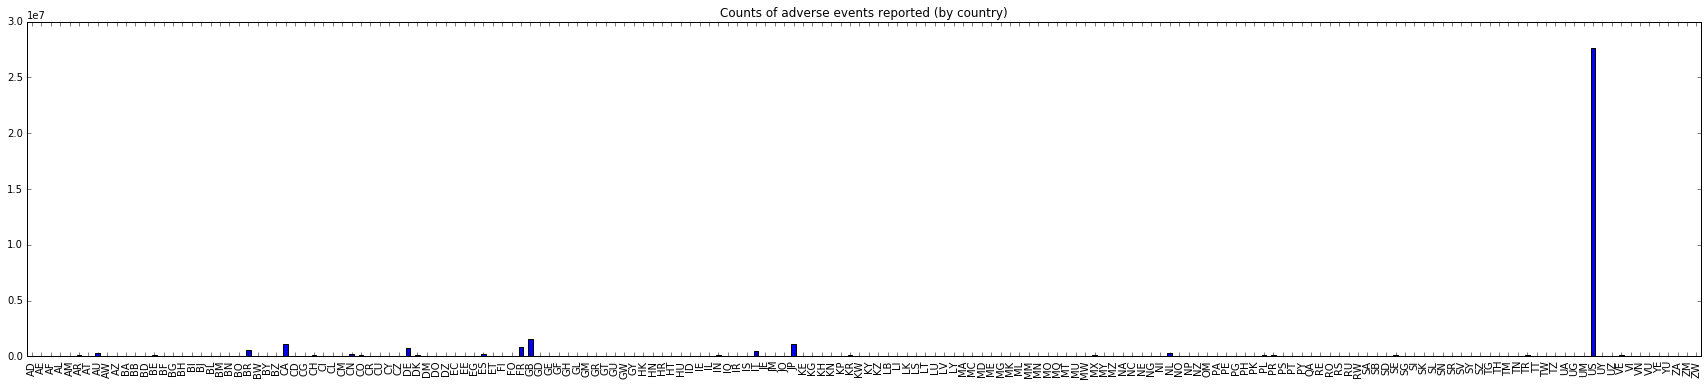

In [57]:
final_df.sum(axis=1).plot(kind="bar", figsize = (30,6))
plt.title("Counts of adverse events reported (by country)")
plt.show()

# the US is definitely OVER REPRESENTED!

##### Number of different adverse events reported by country (out of a total of 100 different possible events)

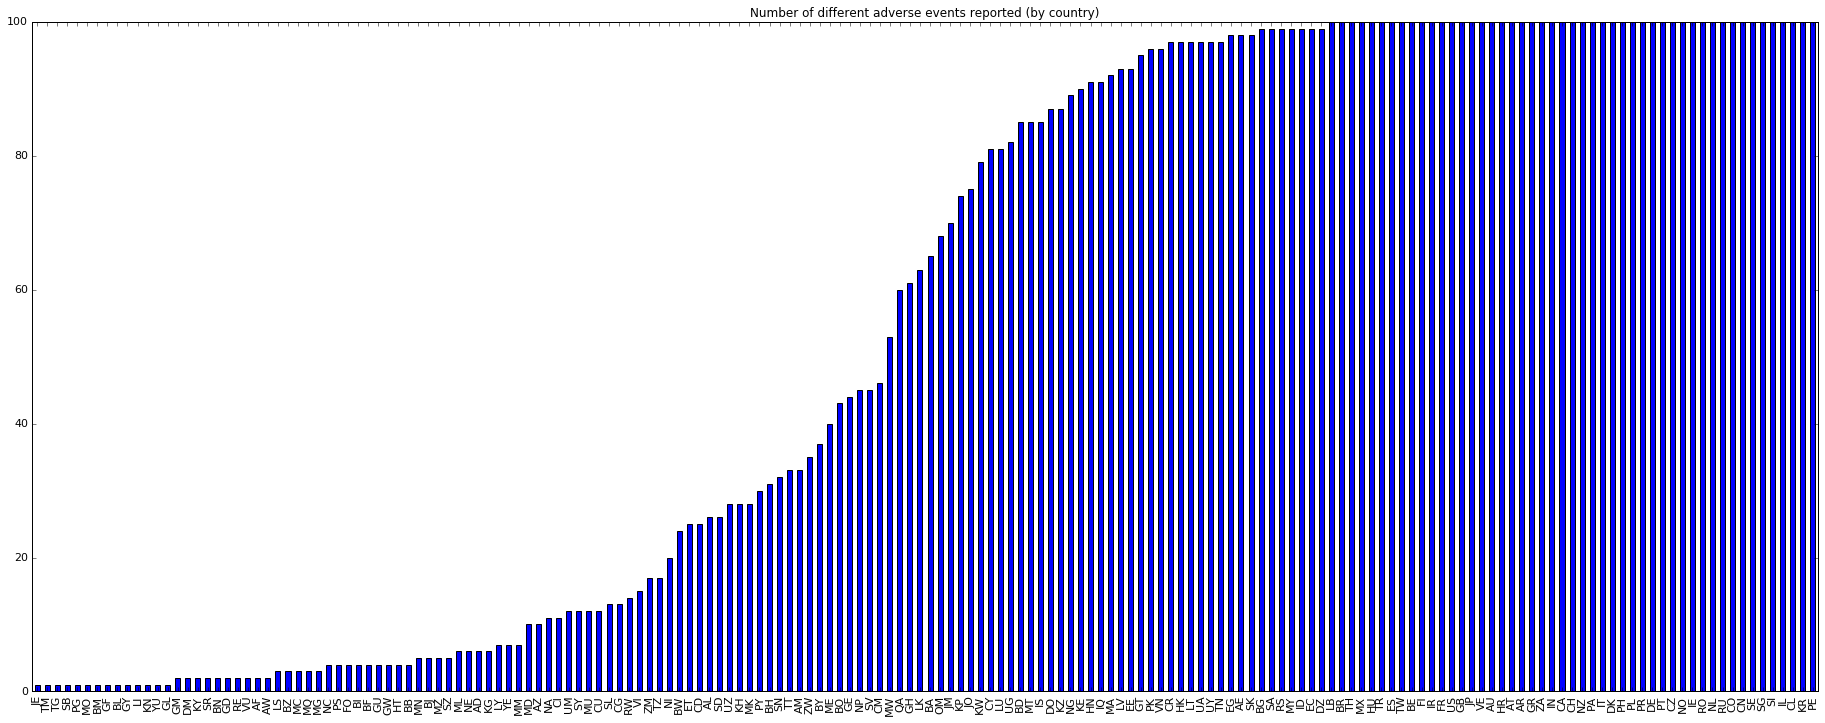

In [59]:
final_df.transpose().describe().loc["count"].sort_values().plot(kind="bar", figsize = (32,12), fontsize= 11)
plt.title("Number of different adverse events reported (by country)")

plt.show()

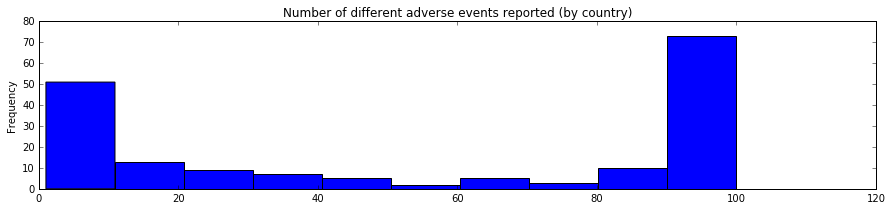

In [60]:
final_df.transpose().describe().loc["count"].plot(kind="hist", figsize = (15,3))
plt.title("Number of different adverse events reported (by country)")
plt.show()

In [66]:
# grouping countries into continents 

continents = pd.read_csv("./data/continents.csv")

continent_dict = {}
for i in continents.columns:
    k = list(continents[i].dropna())
    continent_dict.update(dict.fromkeys(k, i))
    
continent_df = final_df.copy()
continent_df["continent"] = [continent_dict.get(i) for i in final_df.index]
continent_df.head(3)

,DRUG+INEFFECTIVE,NAUSEA,DEATH,FATIGUE,HEADACHE,DYSPNOEA,DIARRHOEA,PAIN,DIZZINESS,VOMITING,...,INFLUENZA+LIKE+ILLNESS,DISEASE+PROGRESSION,ABDOMINAL+DISTENSION,NO+ADVERSE+EVENT,TOXICITY+TO+VARIOUS+AGENTS,CARDIAC+ARREST,PSORIASIS,COMPLETED+SUICIDE,HEART+RATE+INCREASED,continent
AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,europe
AE,48.0,24.0,24.0,12.0,12.0,20.0,13.0,67.0,17.0,29.0,...,25.0,7.0,22.0,210.0,38.0,14.0,8.0,5.0,70.0,asia
AF,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,asia


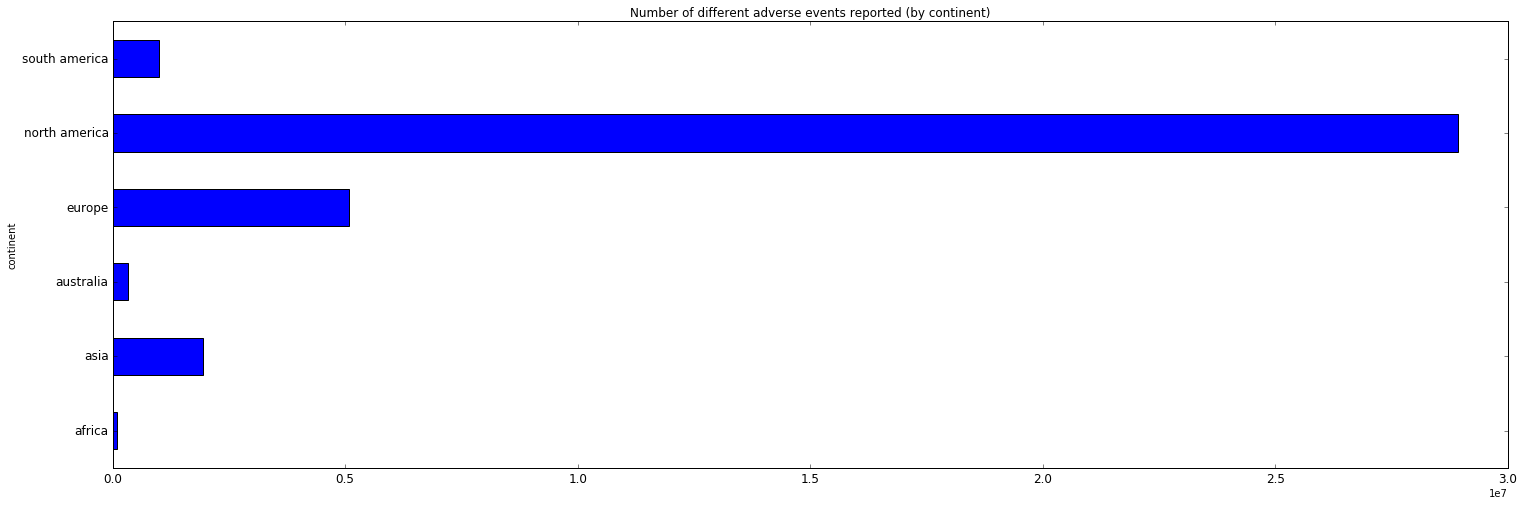

In [67]:
continent_df.groupby("continent").agg("sum").sum(axis=1).plot(kind="barh", figsize = (25,8), fontsize= 12)
plt.title("Number of different adverse events reported (by continent)")
plt.show()

##### Most common adverse events

In [68]:
common_by_country = final_df.idxmax(axis=1)
top_disease = common_by_country.value_counts()[:25].index

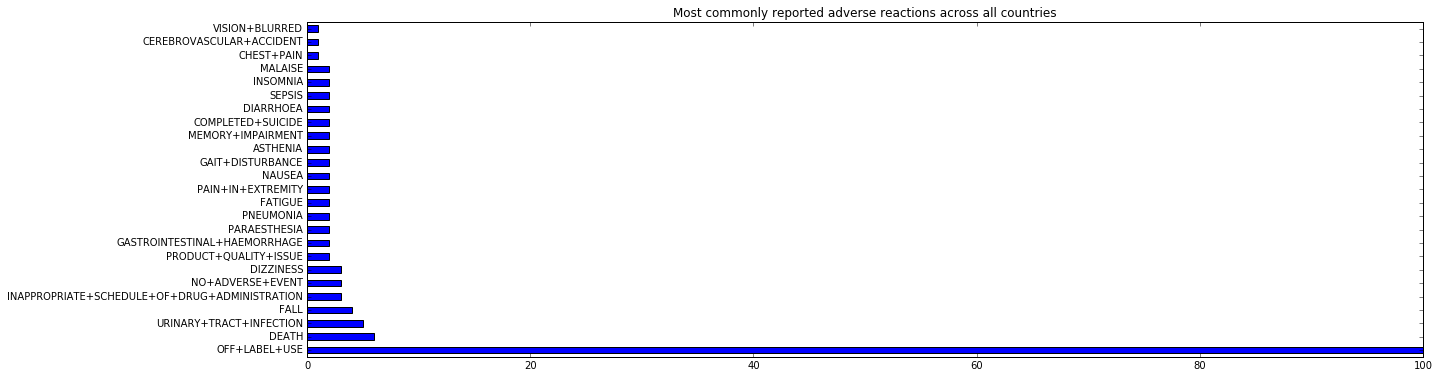

In [69]:
common_by_country.value_counts()[:25].plot(kind="barh", figsize=(20,6))
plt.title("Most commonly reported adverse reactions across all countries")
# by number of countries which report the specific adverse event as their most common one 
plt.show()

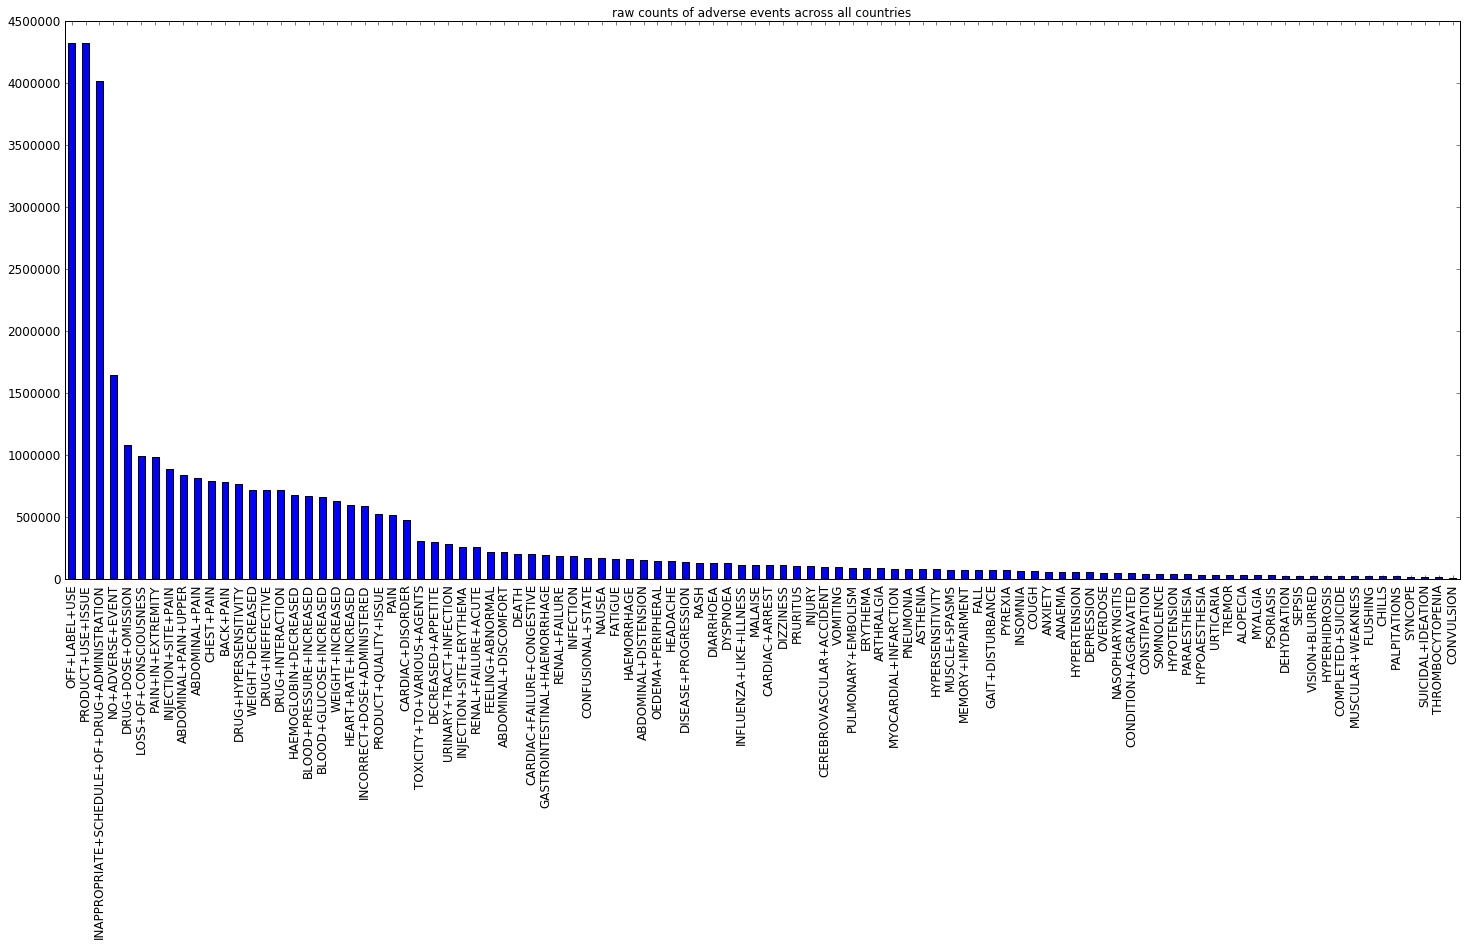

In [70]:
final_df.sum().sort_values(ascending=False).plot(kind = "bar", figsize= (25,10), fontsize=12)
plt.title("raw counts of adverse events across all countries")
plt.show()

#### Top 10 most common adverse events (by top 25 countries with most reported adverse events)

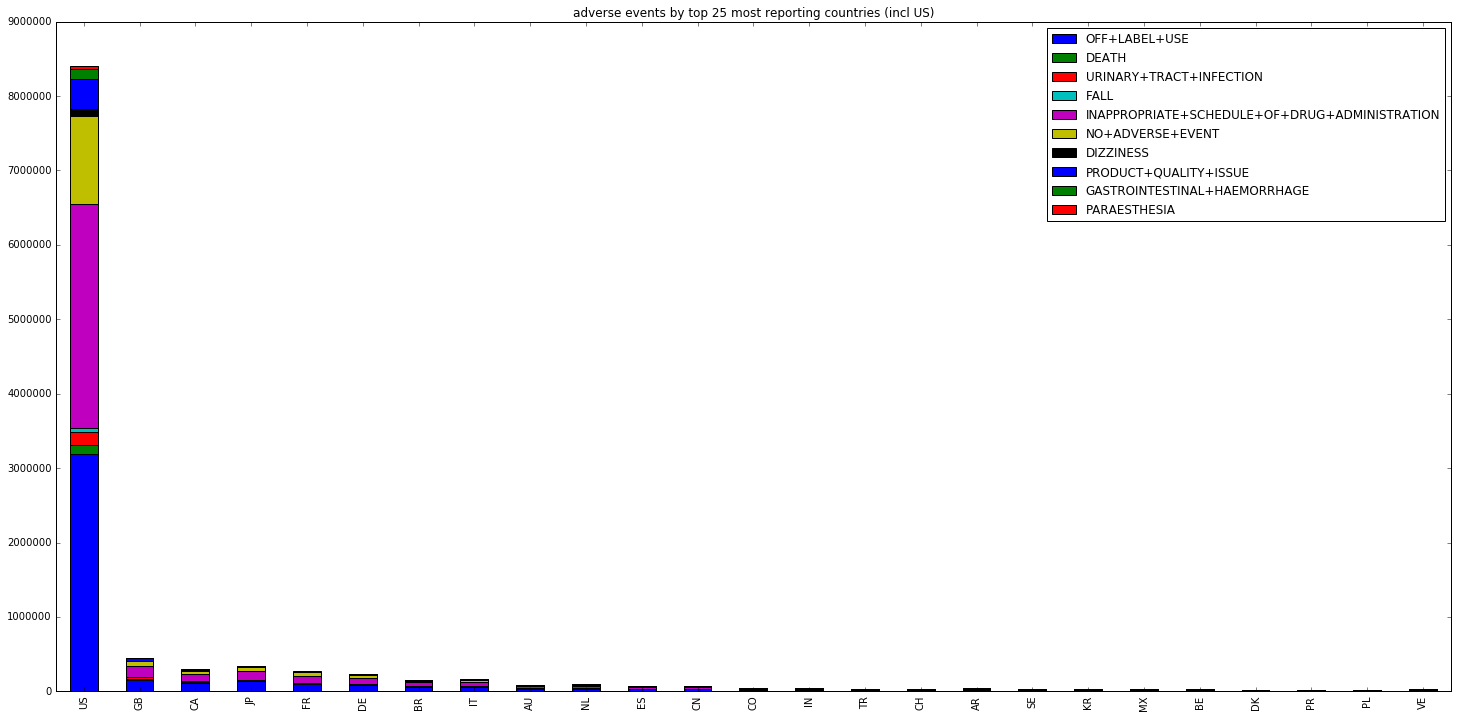

In [71]:
# Top 10 most common adverse events (by top 25 countries with most reported adverse events)
most_reported_events_by_country = final_df.sum(axis=1).sort_values(ascending=False)
top_countries = most_reported_events_by_country.index[:25]

final_df.loc[top_countries][top_disease[:10]].plot(kind="bar", figsize=(25,12), stacked = True)
plt.title("adverse events by top 25 most reporting countries (incl US)")
plt.show()

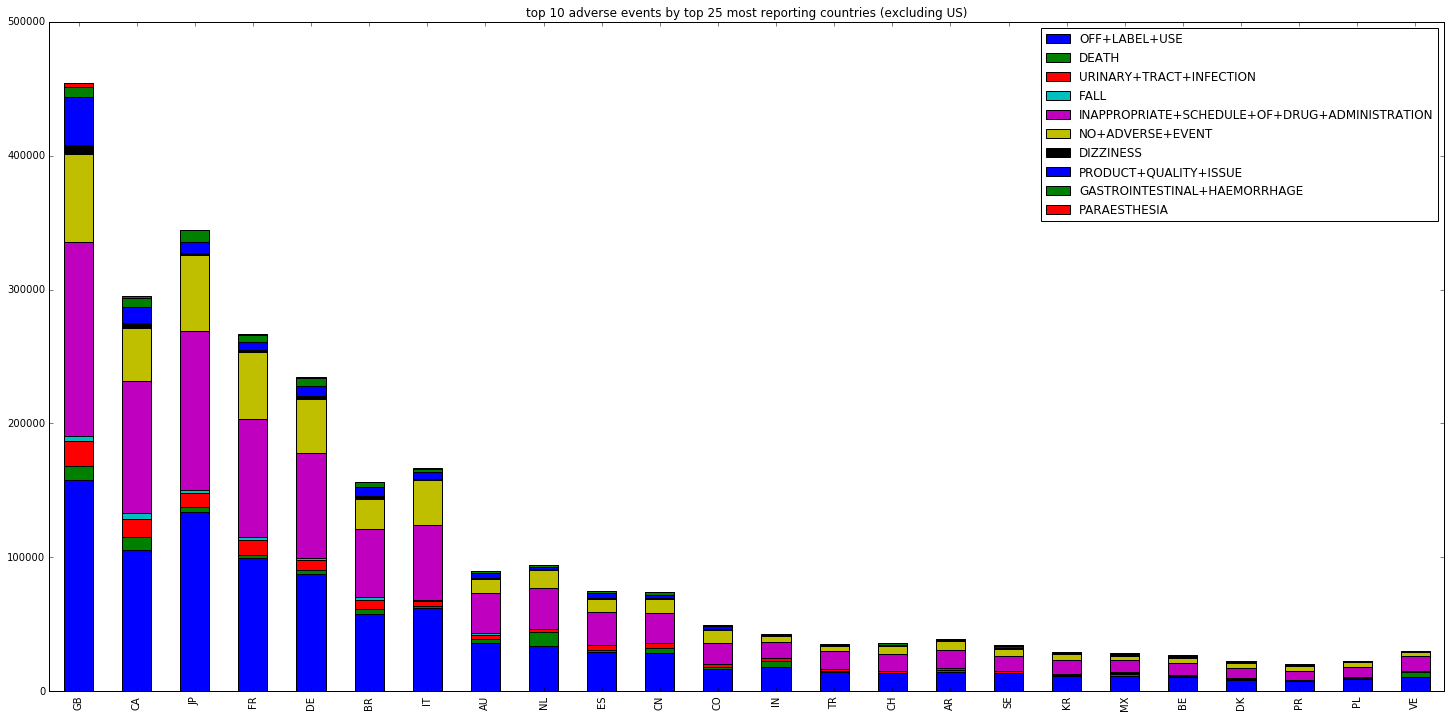

In [72]:
# Top 10 most common adverse events (by top 25 countries with most reported adverse events)
most_reported_events_by_country = final_df.sum(axis=1).sort_values(ascending=False)
top_countries = most_reported_events_by_country.index[:25]

final_df.loc[top_countries][top_disease[:10]].drop("US", axis=0).plot(kind="bar", figsize=(25,12), stacked = True)
plt.title("top 10 adverse events by top 25 most reporting countries (excluding US)")
plt.show()

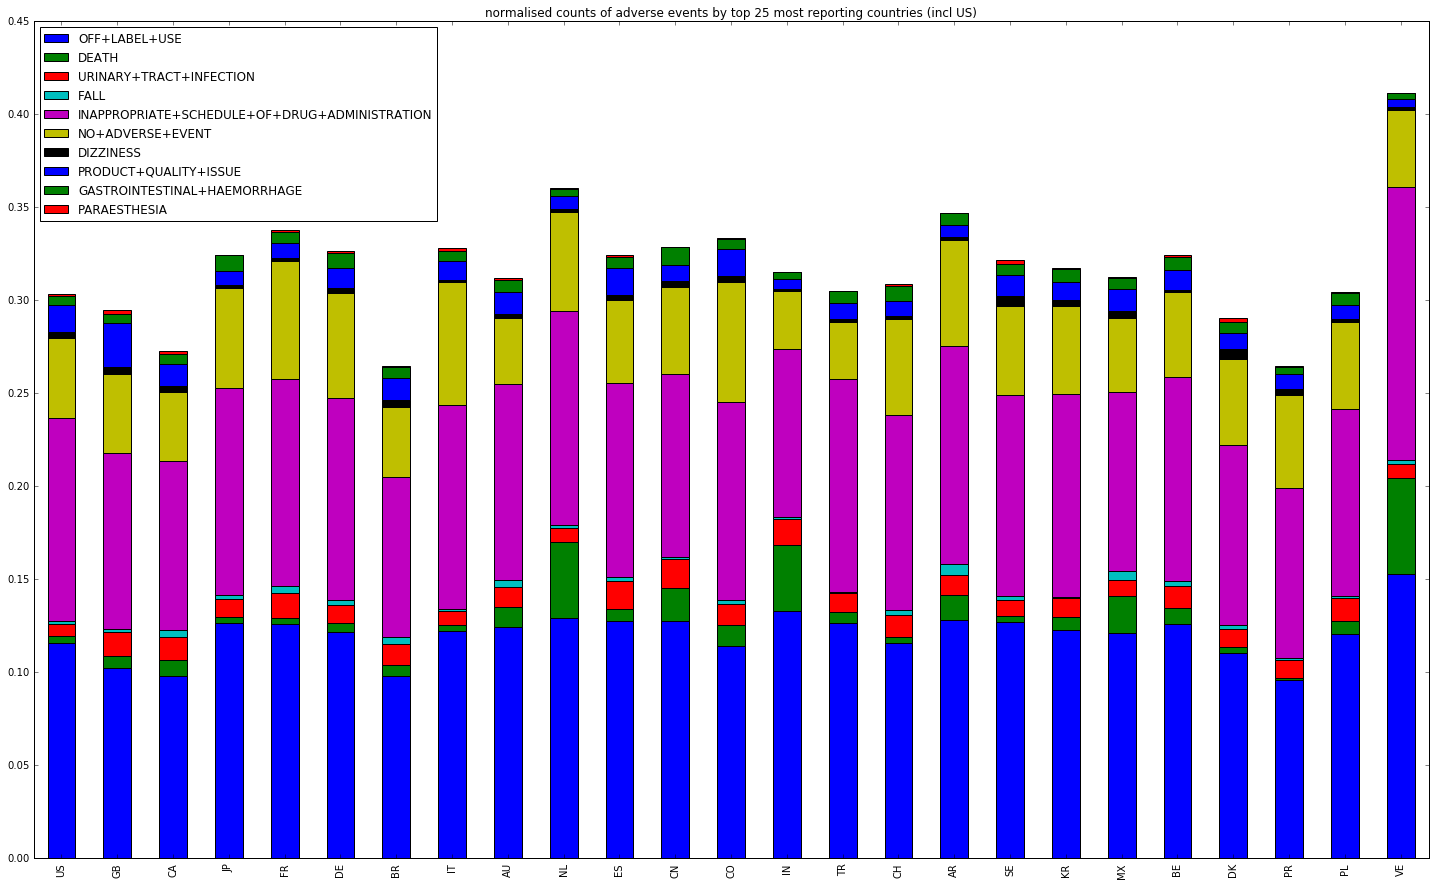

In [73]:
# NORMALISED - Top 10 most common adverse events (by top 25 countries with most reported adverse events)
norm_df = final_df.divide(final_df.sum(axis=1), axis=0)
norm_df.loc[top_countries][top_disease[:10]].plot(kind="bar", figsize=(25,15), stacked = True)
plt.title("normalised counts of adverse events by top 25 most reporting countries (incl US)")
plt.show()

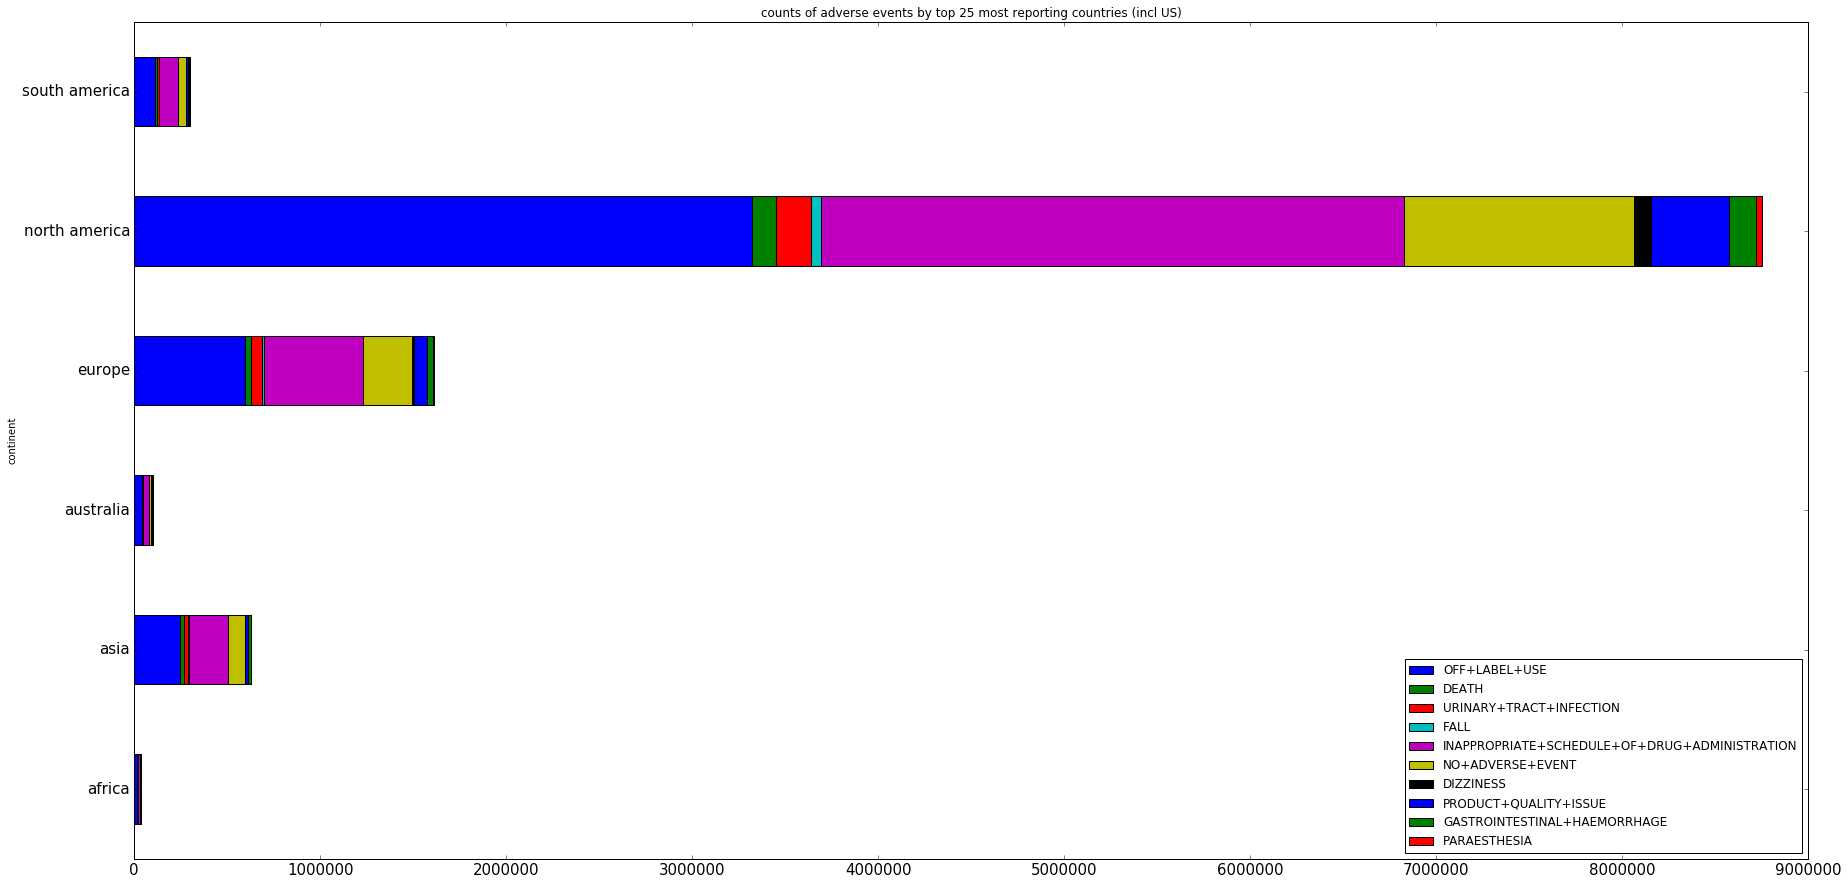

In [74]:
# NORMALISED - Top 10 most common adverse events (by continent)
continent_df.groupby("continent").agg("sum")[top_disease[:10]].plot(kind="barh", figsize=(30,15), 
                                                                    stacked = True, fontsize = 15)
plt.title("counts of adverse events by top 25 most reporting countries (incl US)")
plt.show()

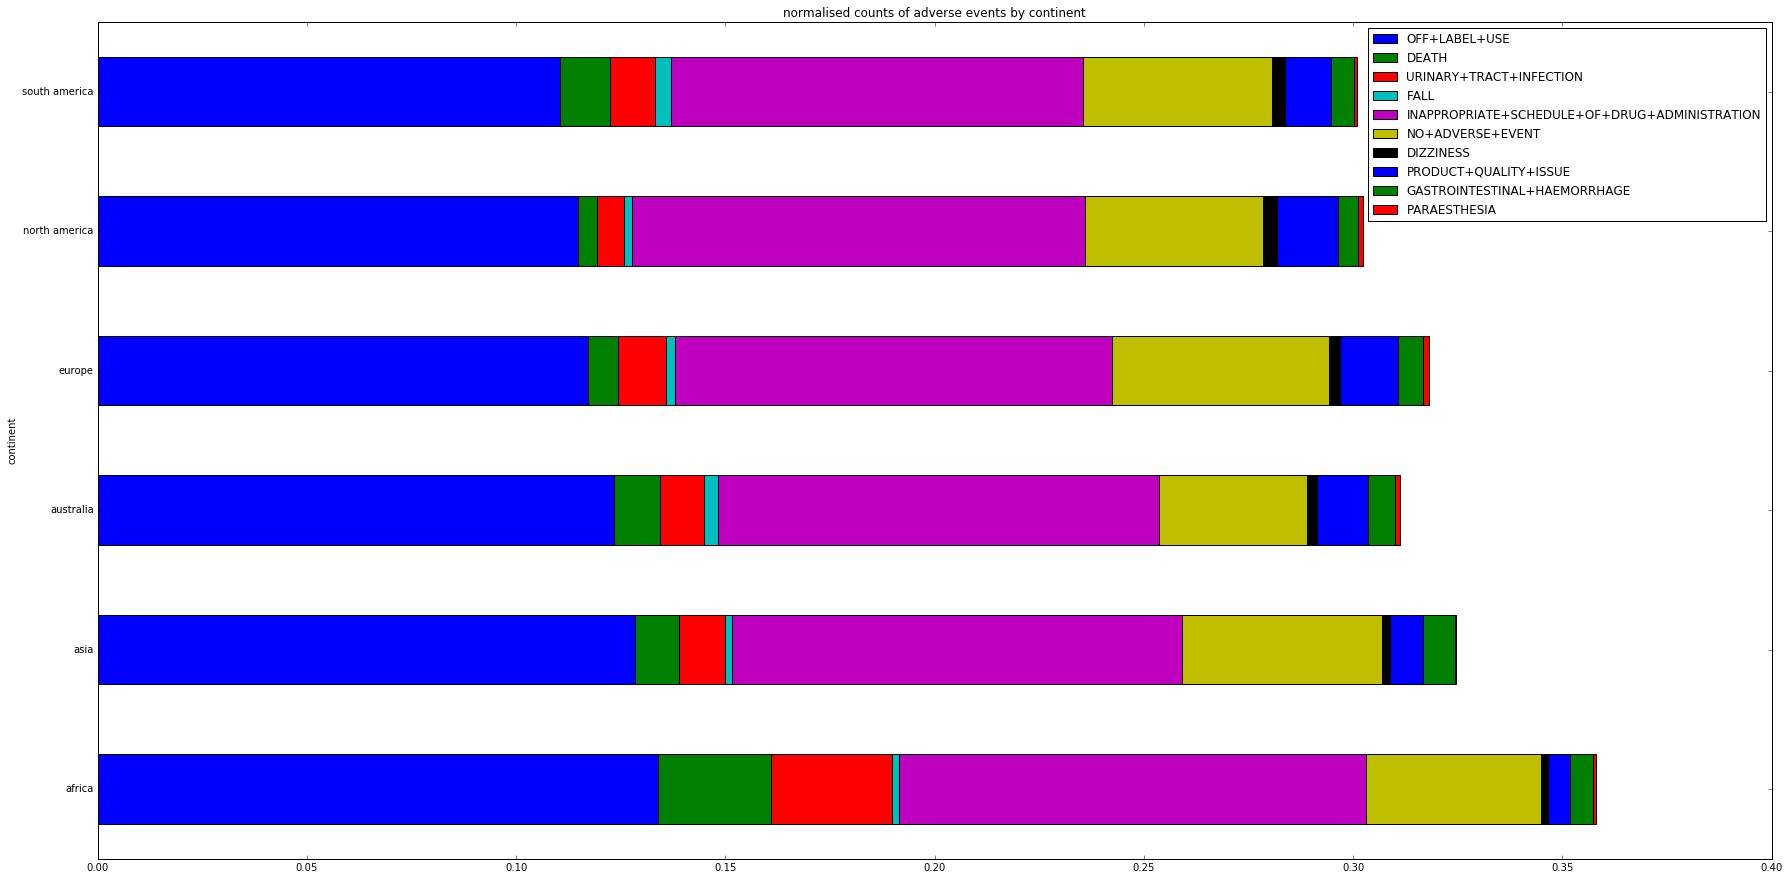

In [75]:
# NORMALISED - Top 10 most common adverse events (by continent)
continent_counts = continent_df.groupby("continent").agg("sum")
norm_continents = continent_counts.divide(continent_counts.sum(axis=1), axis=0)

norm_continents[top_disease[:10]].plot(kind="barh", figsize=(30,15), stacked = True)
plt.title("normalised counts of adverse events by continent")
plt.show()

### Who is reporting adverse drug reactions?

In [76]:
#get reporter data by country
URL = "https://api.fda.gov/drug/event.json?search=primarysource.qualification:XXX&count=occurcountry.exact"
URL_x=[]
for i in range(1,6):
    URL_x.append(URL.replace("XXX", str(i)))
    
# download data and store in dataframe
df_append = []
for url in URL_x:
    data = requests.get(url).json()
    df = pd.DataFrame(data.get("results"))
    df.set_index("term", drop=True, inplace=True)
    df_append.append(df)

In [77]:
# concatenate 
reporter_dict = {1:"Physician", 2:"Pharmacist", 3:"Other health professional", 4:"Lawyer", 5:"Consumer or non-health professional"}
reporter_df = pd.concat(df_append, axis = 1)
reporter_df.columns = [reporter_dict.get(i) for i in range(1,6)]
reporter_df.shape

(124, 5)

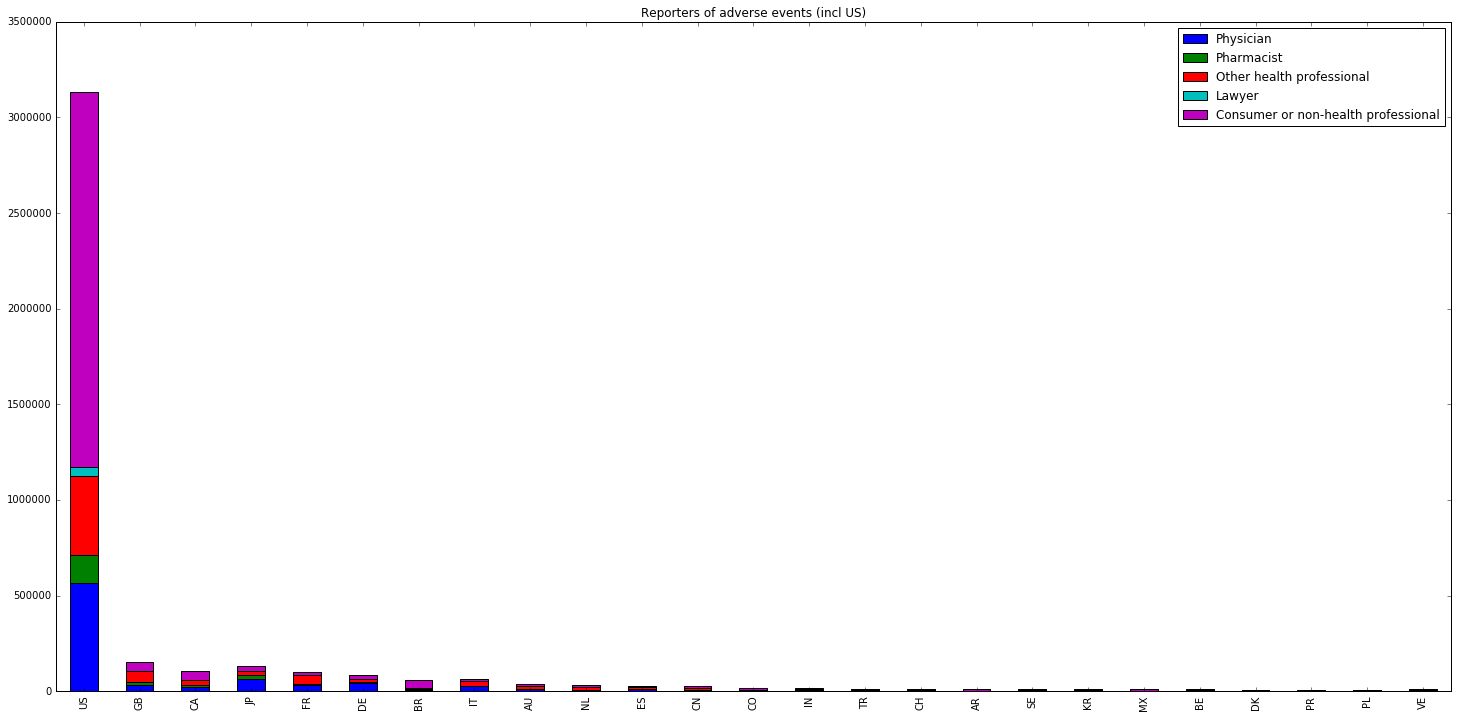

In [78]:
# Reporters of adverse events (incl US)

reporter_df.loc[top_countries].plot(kind="bar", figsize=(25,12), stacked = True)
plt.title("Reporters of adverse events (incl US)")
plt.show()

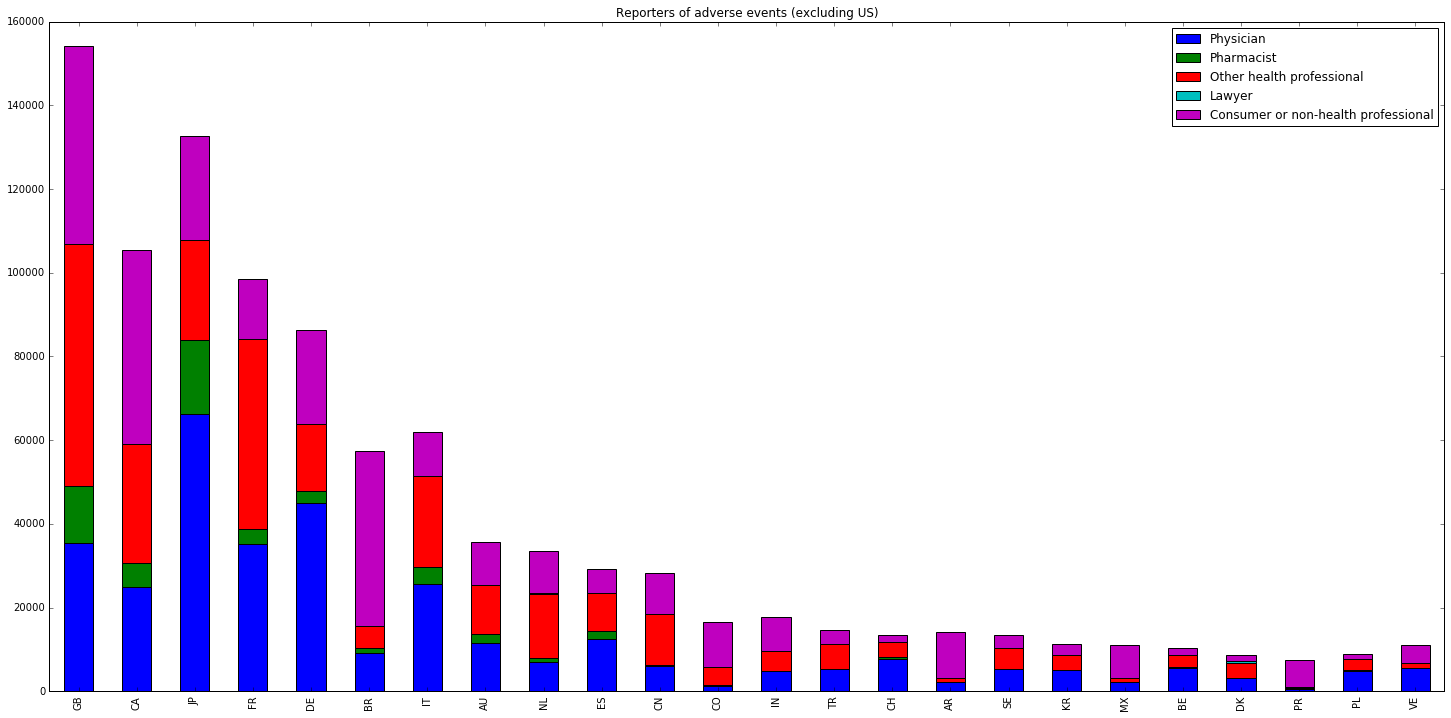

In [79]:
# Reporters of adverse events (excluding US)

reporter_df.loc[top_countries].drop("US", axis=0).plot(kind="bar", figsize=(25,12), stacked = True)
plt.title("Reporters of adverse events (excluding US)")
plt.show()

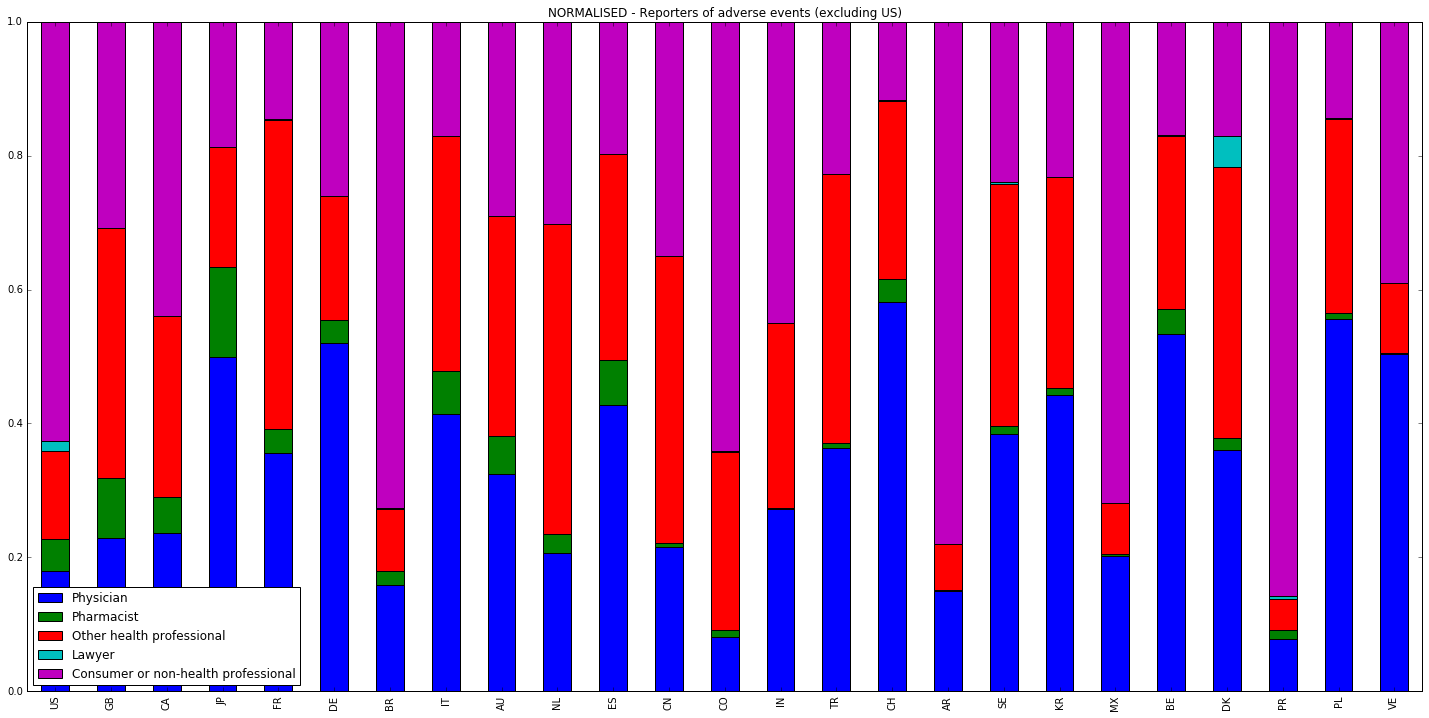

In [80]:
# NORMALISED - Reporters of adverse events (excluding US)

norm_reporter_df = reporter_df.divide(reporter_df.sum(axis=1), axis=0)
norm_reporter_df.loc[top_countries].plot(kind="bar", figsize=(25,12), stacked = True)
plt.title("NORMALISED - Reporters of adverse events (excluding US)")
plt.show()

##### Who is reporting off-label use?

In [81]:
#get off label reporter data
URL = "https://api.fda.gov/drug/event.json?search=patient.reaction.reactionmeddrapt.exact:OFF+LABEL+USE&count=primarysource.qualification"
off_label_data = requests.get(URL).json()

In [82]:
off_label_df = pd.DataFrame(off_label_data.get("results"))
reporter_dict = {1:"Physician", 2:"Pharmacist", 3:"Other health professional", 4:"Lawyer", 5:"Consumer or non-health professional"}
off_label_df["reporter"] = [reporter_dict.get(i) for i in off_label_df.term]
off_label_df.drop(["term"], axis=1, inplace=True)

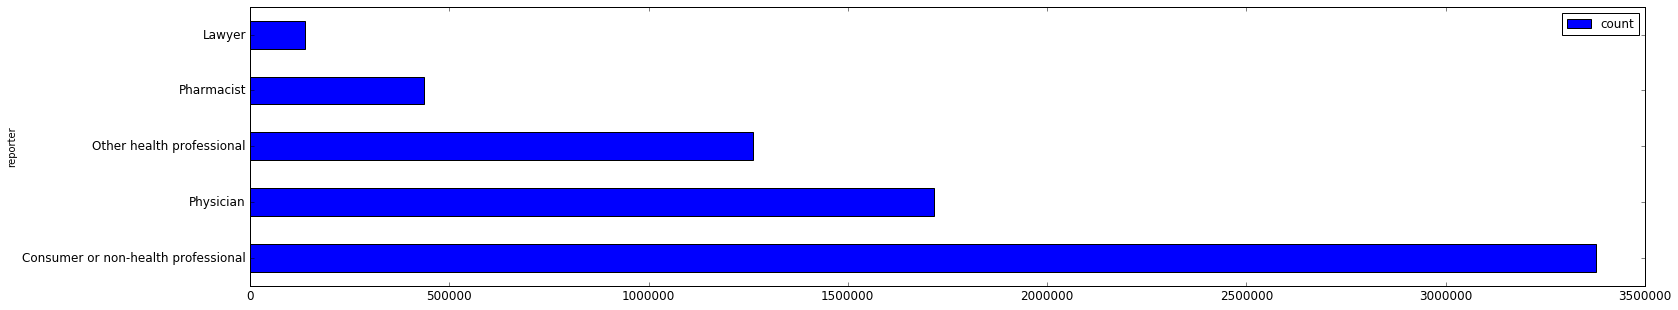

In [83]:
off_label_df.set_index("reporter", drop=True).plot(kind="barh", figsize = (25,5), fontsize=12)
plt.show()

### Serious events
##### serious event: adverse event resulted in death, a life threatening condition, hospitalization, disability, congenital anomaly, or other serious condition

In [84]:
# list of reactions
rxns = []
for i in rxn_counts.term:
    rxns.append(i.replace(" ", "+"))

# create list of URLS to get reaction counts for all countries
URL = "https://api.fda.gov/drug/event.json?search=patient.reaction.reactionmeddrapt:XXX&count=serious"
URL_x=[]
for i in rxns:
    URL_x.append(URL.replace("XXX", i))

# download data and store in dataframe
df_append = []
for url in URL_x:
    data = requests.get(url).json()
    df = pd.DataFrame(data.get("results"))
    df.set_index("term", drop=True, inplace=True)
    df_append.append(df)

In [85]:
serious_df = pd.concat(df_append, axis=1)
serious_df.columns = rxns
serious_df.shape

(2, 100)

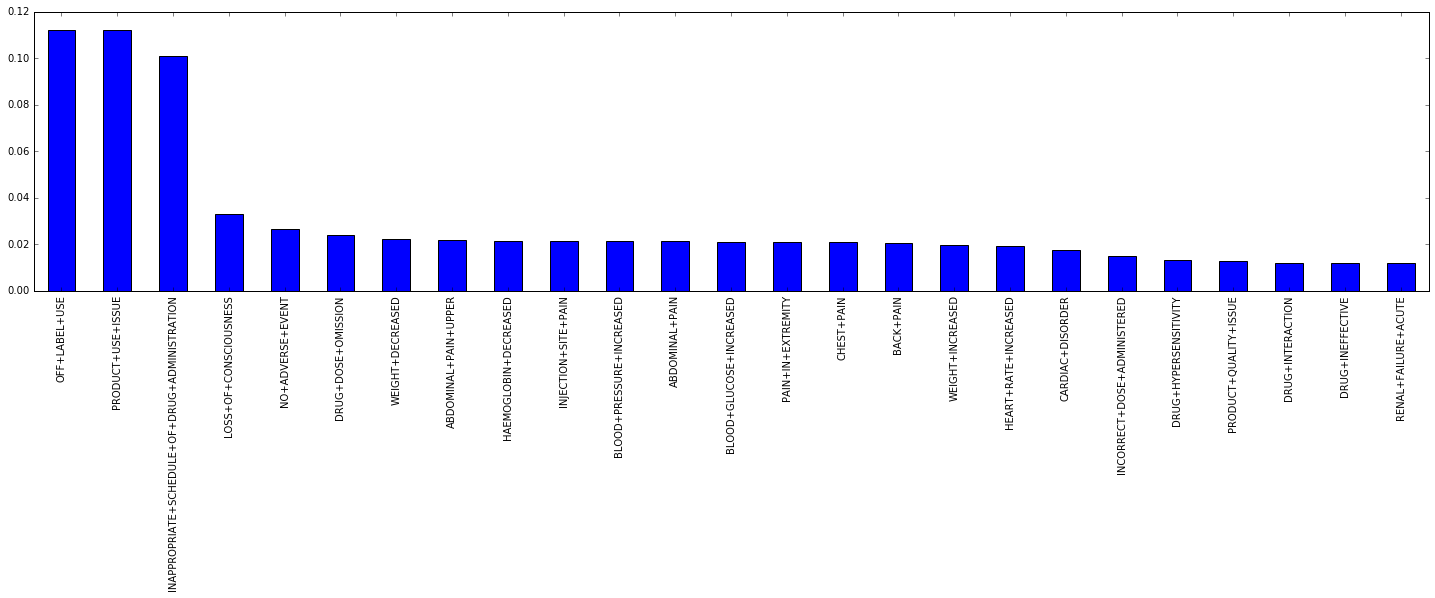

In [86]:
norm_serious_df = serious_df.divide(serious_df.sum(axis=1), axis=0)
norm_serious_df.T.sort_values(by=1, ascending=False).iloc[:25,0].plot(kind="bar", figsize = (25,5))
plt.show()

### GDP

In [115]:
gdp = pd.read_csv("./data/gdp_data.csv", usecols = ["Country Code", "IncomeGroup", "TableName"])
cc = pd.read_csv("./data/country_codes.csv")

cc.columns = ["TableName","code"]
cc_df = cc.merge(gdp, on="TableName")

In [126]:
gdp_df = final_df.merge(cc_df, left_index=True, right_on = "code").drop(["Country Code", "TableName"],axis=1)
#.set_index("code", drop=True)

In [155]:
g = gdp_df.groupby(["IncomeGroup"]).sum()[top_disease[:10]]
norm_g = g.divide(g.sum(axis=1), axis=0)

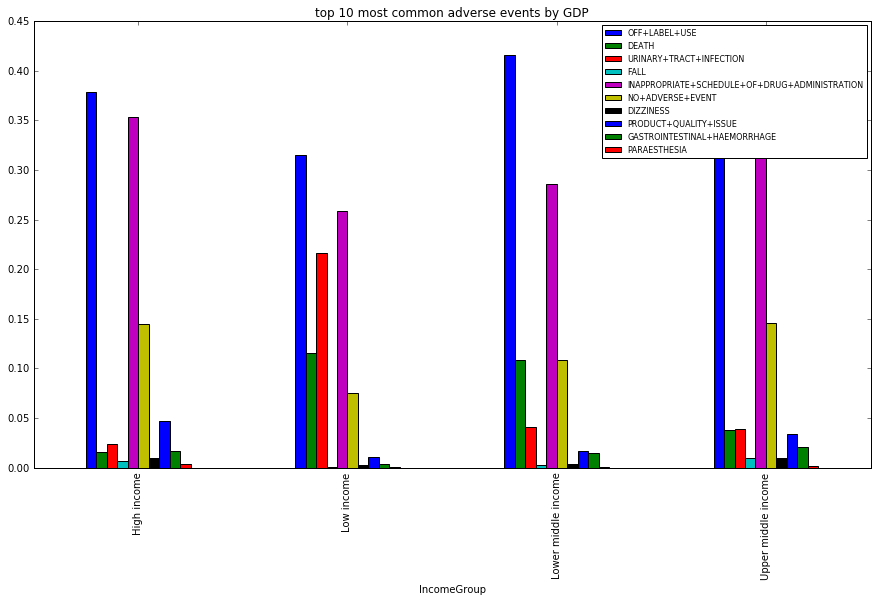

In [164]:
norm_g.plot(kind="bar", figsize=(15, 8), stacked=False)
plt.legend(fontsize=8, loc = 1)
plt.title("top 10 most common adverse events by GDP")
plt.show()